In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
from skimage import color
from skimage.io import imread, imshow
from tensorflow import keras
from skimage.morphology import label
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
seed = 46
np.random.seed = seed

IMG_WIDTH = 512
IMG_HEIGHT = 512
#IMG_CHANNELS = 1 

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/Colab_Notebooks/computervision_project/'


train_ids = next(os.walk(TRAIN_PATH))[2]


X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH), dtype=np.uint16)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    print(path,'??')
    img = imread(path)[:,:]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    
    #for mask_file in next(os.walk(path + '/masks/'))[2]:
    mask_ = imread(TRAIN_PATH + '/mask/' + id_[:-4] + '.png')
    mask_ = resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    gray_image = color.rgb2gray(mask_[:, :, :3])
    #mask = np.maximum(mask, mask_)  
    gray_image = np.where(gray_image>0, 255,0)
    Y_train[n] = gray_image



print('Done!')

<ipython-input-5-dc68d6735047>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)


Resizing training images and masks


  0%|          | 0/31 [00:00<?, ?it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/16.jpg ??


  3%|▎         | 1/31 [00:00<00:26,  1.12it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/12.jpg ??


  6%|▋         | 2/31 [00:01<00:26,  1.08it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/3.jpg ??


 10%|▉         | 3/31 [00:02<00:26,  1.06it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/30.jpg ??


 13%|█▎        | 4/31 [00:03<00:23,  1.13it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/0.jpg ??


 16%|█▌        | 5/31 [00:04<00:22,  1.17it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/15.jpg ??


 19%|█▉        | 6/31 [00:05<00:20,  1.22it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/19.jpg ??


 23%|██▎       | 7/31 [00:05<00:19,  1.23it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/6.jpg ??


 26%|██▌       | 8/31 [00:06<00:18,  1.21it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/8.jpg ??


 29%|██▉       | 9/31 [00:07<00:18,  1.22it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/10.jpg ??


 32%|███▏      | 10/31 [00:08<00:17,  1.21it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/21.jpg ??


 35%|███▌      | 11/31 [00:09<00:16,  1.21it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/29.jpg ??


 39%|███▊      | 12/31 [00:10<00:15,  1.24it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/24.jpg ??


 42%|████▏     | 13/31 [00:11<00:15,  1.13it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/1.jpg ??


 45%|████▌     | 14/31 [00:12<00:15,  1.08it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/5.jpg ??


 48%|████▊     | 15/31 [00:12<00:13,  1.22it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/22.jpg ??


 52%|█████▏    | 16/31 [00:13<00:12,  1.20it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/23.jpg ??


 55%|█████▍    | 17/31 [00:14<00:11,  1.19it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/25.jpg ??


 58%|█████▊    | 18/31 [00:15<00:10,  1.19it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/17.jpg ??


 61%|██████▏   | 19/31 [00:16<00:09,  1.22it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/27.jpg ??


 65%|██████▍   | 20/31 [00:16<00:08,  1.23it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/2.jpg ??


 68%|██████▊   | 21/31 [00:17<00:07,  1.28it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/26.jpg ??


 71%|███████   | 22/31 [00:18<00:07,  1.28it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/7.jpg ??


 74%|███████▍  | 23/31 [00:19<00:06,  1.28it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/14.jpg ??


 77%|███████▋  | 24/31 [00:19<00:05,  1.24it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/13.jpg ??


 81%|████████  | 25/31 [00:20<00:04,  1.25it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/18.jpg ??


 84%|████████▍ | 26/31 [00:21<00:03,  1.25it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/20.jpg ??


 87%|████████▋ | 27/31 [00:22<00:03,  1.25it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/28.jpg ??


 90%|█████████ | 28/31 [00:23<00:02,  1.27it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/11.jpg ??


 94%|█████████▎| 29/31 [00:23<00:01,  1.23it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/9.jpg ??


 97%|█████████▋| 30/31 [00:24<00:00,  1.24it/s]

/content/drive/MyDrive/Colab_Notebooks/computervision_project/4.jpg ??


100%|██████████| 31/31 [00:25<00:00,  1.21it/s]

Done!


In [ ]:
from keras import backend as K
def recall(y_true,y_pred):                          
    #y_true = K.ones_like(y_true)                              
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true,y_pred):
    #y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def dice(y_true,y_pred):
    #y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))   
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    dice = true_positives*2 / (predicted_positives + all_positives + K.epsilon())
    return dice
    #y_true = K.ones_like(y_true)
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))
    
def iou(y_true,y_pred):    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))   
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    iou = true_positives / (predicted_positives + all_positives - true_positives + K.epsilon())
    return iou

In [ ]:
import time
time_start = time.time()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from tensorflow.python.saved_model import loader_impl
from tensorflow.python.keras.saving.saved_model import load as saved_model_load
epoch1=50
maxdice=0
SUM=0
splits_n=5
fold_n=0
fold_dice=np.empty(splits_n)

fk = KFold(n_splits=splits_n, shuffle=True)
for trn, tst in fk.split(X_train) :
  fold_n=fold_n+1
  print(trn)
  print(tst)
  print("---")
  trn1=trn.size 
  tst1=tst.size 
  xtrain = np.zeros((trn1, IMG_HEIGHT, IMG_WIDTH), dtype=np.uint16)
  ytrain = np.zeros((trn1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool) 
  xtest = np.zeros((tst1, IMG_HEIGHT, IMG_WIDTH), dtype=np.uint16)
  ytest = np.zeros((tst1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool) 
  for k in range(trn1)  :
    xtrain[k]=(X_train[trn[k]])
    ytrain[k]=(Y_train[trn[k]])
  for k in range(tst1):
    xtest[k]=(X_train[tst[k]])
    ytest[k]=(Y_train[tst[k]])

  inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, 1)) 
  s = tf.keras.layers.Lambda(lambda x: x / 10000)(inputs)
  print('lambda',s)

  #Contraction path
  c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
  c1 = tf.keras.layers.Dropout(0.1)(c1)
  c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
  p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
  c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
  c2 = tf.keras.layers.Dropout(0.1)(c2)
  c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
  p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
  
  c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
  c3 = tf.keras.layers.Dropout(0.2)(c3)
  c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
  p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
  
  c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
  c4 = tf.keras.layers.Dropout(0.2)(c4)
  c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
  p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
  
  c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
  c5 = tf.keras.layers.Dropout(0.3)(c5)
  c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

  #Expansive path 
  u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
  u6 = tf.keras.layers.concatenate([u6, c4])
  c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
  c6 = tf.keras.layers.Dropout(0.2)(c6)
  c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
  
  u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
  u7 = tf.keras.layers.concatenate([u7, c3])
  c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
  c7 = tf.keras.layers.Dropout(0.2)(c7)
  c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
  
  u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
  u8 = tf.keras.layers.concatenate([u8, c2])
  c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
  c8 = tf.keras.layers.Dropout(0.1)(c8)
  c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
  
  u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
  u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
  c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
  c9 = tf.keras.layers.Dropout(0.1)(c9)
  c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
  
  outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
  
  model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
  #lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3,decay_steps=1000,decay_rate=0.2)
  #opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  opt = tf.keras.optimizers.Adam(learning_rate=0.0004)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', precision, recall, dice])
  #model.summary()
  #tf.keras.utils.plot_model(model, to_file='model.png')
  callbacks = [
        #tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]
  results = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=1, epochs=epoch1, callbacks=callbacks)


  if results.history['val_dice'][epoch1-1]>maxdice:
    maxdice=results.history['val_dice'][epoch1-1]
    model.save('/content/drive/MyDrive/Colab_Notebooks/computervision.hdf5')
    TRN=trn
    TST=tst
    SUM=SUM+1

print(maxdice)


####################################

[ 0  1  2  3  4  5  7  8 10 11 12 13 14 15 18 20 21 22 24 25 26 27 28 29]
[ 6  9 16 17 19 23 30]
---
lambda KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None), name='lambda_7/truediv:0', description="created by layer 'lambda_7'")


<ipython-input-10-8c5ba76ffdff>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ytrain = np.zeros((trn1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)
<ipython-input-10-8c5ba76ffdff>:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ytest = np.zeros((tst1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)


Epoch 1/50
24/24 [==============================] - 10s 72ms/step - loss: 0.2944 - accuracy: 0.9646 - precision: 0.0119 - recall: 0.0211 - dice: 0.0107 - val_loss: 0.1098 - val_accuracy: 0.9833 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_dice: 0.0000e+00
Epoch 2/50
24/24 [==============================] - 1s 52ms/step - loss: 0.1010 - accuracy: 0.9832 - precision: 0.0089 - recall: 2.8929e-05 - dice: 5.7638e-05 - val_loss: 0.1472 - val_accuracy: 0.9833 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_dice: 0.0000e+00
Epoch 3/50
24/24 [==============================] - 1s 53ms/step - loss: 0.0778 - accuracy: 0.9832 - precision: 0.0000e+00 - recall: 0.0000e+00 - dice: 0.0000e+00 - val_loss: 0.0942 - val_accuracy: 0.9833 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_dice: 0.0000e+00
Epoch 4/50
24/24 [==============================] - 1s 53ms/step - loss: 0.0464 - accuracy: 0.9832 - precision: 0.0000e+00 - recall: 0.0000e+00 - dice: 0.0000e+00 - val_los

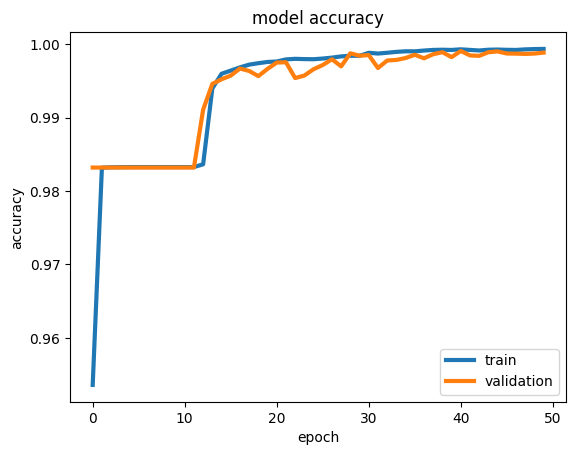

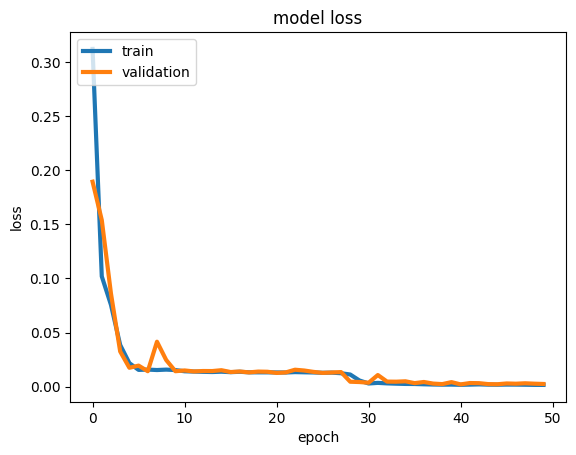

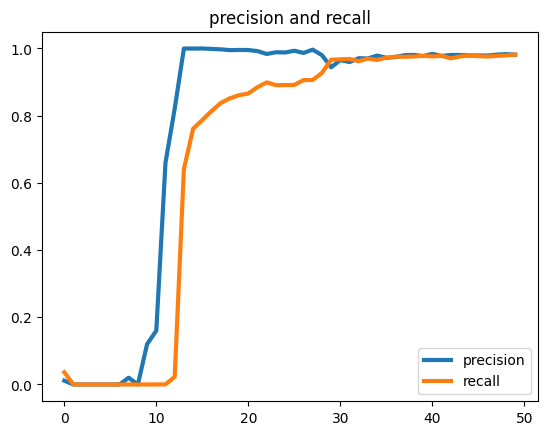

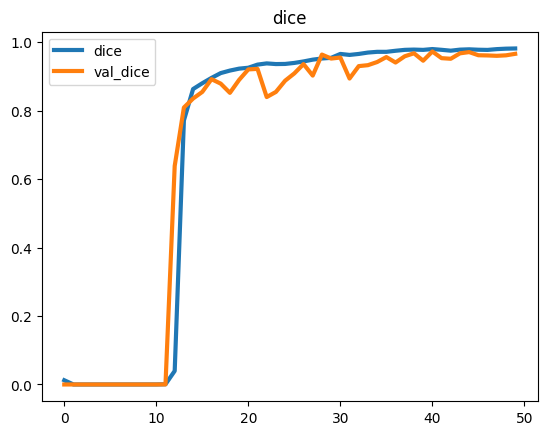

0.9655949473381042


In [ ]:
plt.plot(results.history['accuracy'], linewidth=3)
plt.plot(results.history['val_accuracy'], linewidth=3)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'], linewidth=3)
plt.plot(results.history['val_loss'], linewidth=3)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/plotloss.png')
plt.show()

plt.plot(results.history['precision'], linewidth=3)
plt.plot(results.history['recall'], linewidth=3)
plt.title('precision and recall')
plt.legend(['precision', 'recall'], loc='lower right')
plt.show()
#n1 = my_iou_metric.numpy()


plt.plot(results.history['dice'], linewidth=3)
plt.plot(results.history['val_dice'], linewidth=3)
plt.legend(['dice', 'val_dice'], loc='upper left')
plt.title('dice')
plt.show()

print(results.history['val_dice'][epoch1-1])

In [ ]:
idx = random.randint(0, len(X_train))

preds_train = 0
preds_val = 0
preds_test = 0


model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/computervision.hdf5', custom_objects={'precision': precision, 'recall': recall, 'dice': dice})
preds_train = model.predict(X_train[TRN], verbose=1)
preds_val = model.predict(X_train[TST], verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint16)
preds_val_t = (preds_val > 0.5).astype(np.uint16)

#20211201

val_Y=Y_train[TST]
val_Y= np.where(val_Y>0 ,65535,0)
Y_train1=Y_train[TRN]
Y_train1 = np.where(Y_train1>0 ,65535,0)
preds_train_t = np.where(preds_train_t > 0.5,65535,0)
preds_val_t = np.where(preds_val_t > 0.5,65535,0)

dermis_line=preds_train_t.copy()
dermis_line_matlab=Y_train1.copy()



1/1 [==============================] - 0s 23ms/step


(6, 512, 512)
5


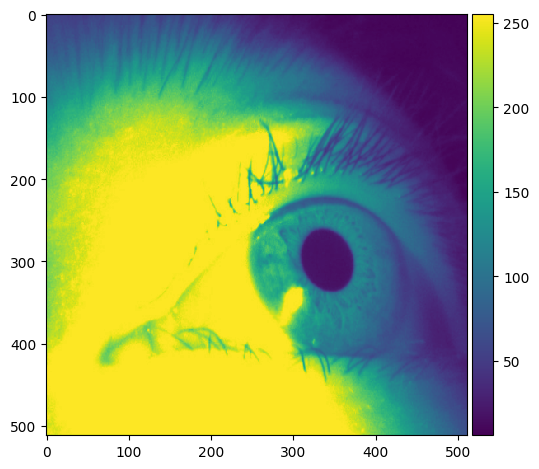

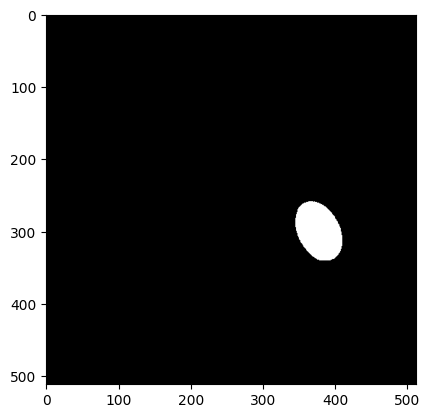

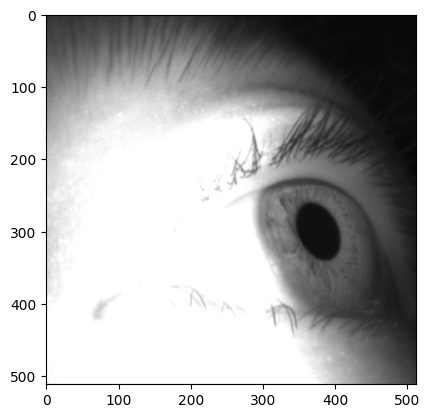

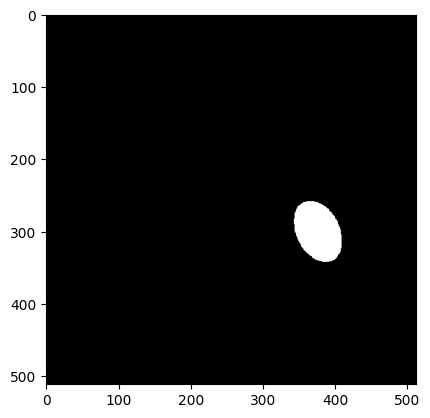

In [ ]:
val_X=X_train[TST]
imshow(val_X[0])
iv = random.randint(0, len(preds_val_t)-1)

plt.figure(10)
plt.imshow(np.squeeze(preds_val_t[iv]), vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('validation_ML_mask_image.png',np.squeeze(preds_val_t[iv]), vmin = 0, vmax = 65535, cmap = 'seismic')

plt.figure(11)
plt.imshow(val_X[iv], vmin = 0, vmax = 255, cmap = 'gray')
plt.imsave('validation_oct_image.png',val_X[iv], vmin = 0, vmax = 255, cmap = 'gray')

plt.figure(12)
plt.imshow(np.squeeze(val_Y[iv]), vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('validation_GT_mask_image.png',np.squeeze(val_Y[iv]), vmin = 0, vmax = 65535, cmap = 'PRGn')

print(np.shape(val_X))
print(iv)

In [ ]:
val_X=X_train[TST]
imshow(val_X[0])
iv = random.randint(0, len(preds_val_t)-1)

plt.figure(10)
plt.imshow(np.squeeze(preds_val_t[iv]), vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('validation_ML_mask_image.png',np.squeeze(preds_val_t[iv]), vmin = 0, vmax = 65535, cmap = 'seismic')

plt.figure(11)
plt.imshow(val_X[iv], vmin = 0, vmax = 255, cmap = 'gray')
plt.imsave('validation_oct_image.png',val_X[iv], vmin = 0, vmax = 255, cmap = 'gray')

plt.figure(12)
plt.imshow(np.squeeze(val_Y[iv]), vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('validation_GT_mask_image.png',np.squeeze(val_Y[iv]), vmin = 0, vmax = 65535, cmap = 'PRGn')

print(np.shape(val_X))
print(iv)

NameError: ignored